# Experiment Leaderboard Analysis

This notebook analyzes the results stored in `experiments_leaderboard.csv`. It compares different models and latent dimensions based on their R2 scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

Loaded 7 experiments.


,timestamp,run_id,model_name,latent_dim,epochs,lr,note,checkpoint,Height Mean (R2),Height Mean (Low CI),...,Min Ferret Skewness (R2),Min Ferret Skewness (Low CI),Min Ferret Skewness (High CI),Area Mean (R2),Area Mean (Low CI),Area Mean (High CI),Volume Mean (R2),Volume Mean (Low CI),Volume Mean (High CI),avg_r2
0,20251118_195609,attention_unet_20251118_195609,attention_unet,64,1,0.001,Sanity Check,checkpoints/attention_unet/attention_unet_2025...,-0.9747,-3.8115,...,-2.2907,-11.6279,0.0267,-1.1270,-4.6028,0.2112,-1.4675,-7.2738,0.3907,-1.464975
1,20251118_222338,variational_autoencoder_20251118_222338,variational_autoencoder,64,1500,0.001,NaN,checkpoints/variational_autoencoder/variationa...,-2.7615,-10.6398,...,-5.1212,-21.3108,0.1052,-3.0185,-11.5066,-0.1887,-1.6412,-7.1872,0.4001,-3.135600
2,20251118_223753,variational_autoencoder_20251118_223753,variational_autoencoder,64,2000,0.001,NaN,checkpoints/variational_autoencoder/variationa...,-1.6281,-5.9835,...,-2.2895,-9.0400,0.1159,-2.6128,-9.4141,-0.0564,-1.2442,-4.8361,0.2708,-1.943650
3,20251118_224229,variational_autoencoder_20251118_224229,variational_autoencoder,64,4000,0.001,NaN,checkpoints/variational_autoencoder/variationa...,-1.9160,-6.6939,...,-3.7707,-15.1679,0.1215,-2.9647,-11.5923,-0.0985,-2.0441,-9.3625,0.1905,-2.673875
4,20251120_200622,variational_autoencoder_20251120_200622,variational_autoencoder,64,1500,0.001,Testing VAE,checkpoints/variational_autoencoder/variationa...,-1.8766,-10.7591,...,-4.0450,-19.9879,0.0953,-2.2952,-9.2279,0.2276,-1.5411,-5.8986,0.2895,-2.439475


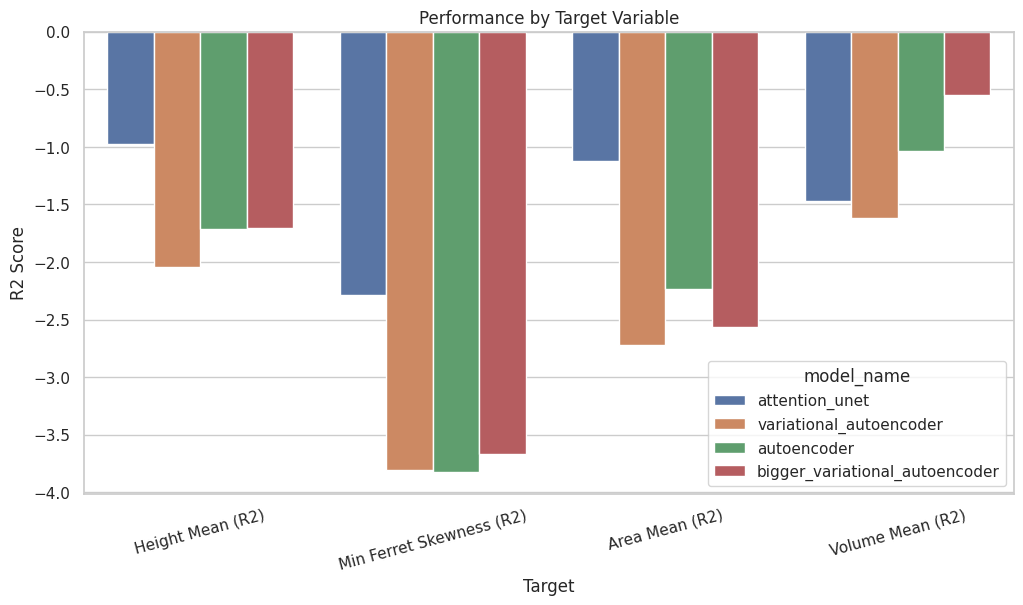

In [2]:
csv_path = "../experiments_leaderboard.csv"

if not os.path.exists(csv_path):
    print(f"Error: {csv_path} not found. Please run experiments first.")
else:
    df = pd.read_csv(csv_path)
    
    # Fix column name mismatch: CSV has 'model', notebook uses 'model_name'
    if 'model' in df.columns:
        df = df.rename(columns={'model': 'model_name'})

    # Calculate 'avg_r2' dynamically from available R2 columns
    r2_cols = [col for col in df.columns if '(R2)' in col]
    if r2_cols:
        df['avg_r2'] = df[r2_cols].mean(axis=1)

    # Convert timestamp to datetime
    print(f"Loaded {len(df)} experiments.")
    display(df.head())

# Dynamically select columns that contain '(R2)'
target_cols = [col for col in df.columns if '(R2)' in col]

if target_cols:
    # Melt dataframe for easier plotting with seaborn
    melted_df = df.melt(id_vars=['model_name', 'timestamp'], 
                        value_vars=target_cols, 
                        var_name='Target', 
                        value_name='R2 Score')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='Target', y='R2 Score', hue='model_name', errorbar=None)
    plt.title('Performance by Target Variable')
    # Removed ylim(0, 1) to visualize negative R2 scores present in the CSV
    plt.xticks(rotation=15)
    plt.show()

## 2. Best Performing Models
Sorting experiments by the highest Average R2 Score.

In [3]:
if 'avg_r2' in df.columns:
    best_models = df.sort_values(by='avg_r2', ascending=False)
    display(best_models[['timestamp', 'model_name', 'latent_dim', 'avg_r2', 'note']].head(10))
else:
    print("Column 'avg_r2' not found in dataframe.")

,timestamp,model_name,latent_dim,avg_r2,note
0,20251118_195609,attention_unet,64,-1.464975,Sanity Check
2,20251118_223753,variational_autoencoder,64,-1.943650,NaN
6,20251120_213932,bigger_variational_autoencoder,64,-2.122525,Testing bigger autoencoder
5,20251120_203555,autoencoder,64,-2.203450,Testing autoencoder
4,20251120_200622,variational_autoencoder,64,-2.439475,Testing VAE
3,20251118_224229,variational_autoencoder,64,-2.673875,NaN
1,20251118_222338,variational_autoencoder,64,-3.135600,NaN


## 3. Performance by Model Architecture
Comparing how different architectures perform on average.

/tmp/ipykernel_221054/3851010286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='model_name', y='avg_r2', palette='viridis')


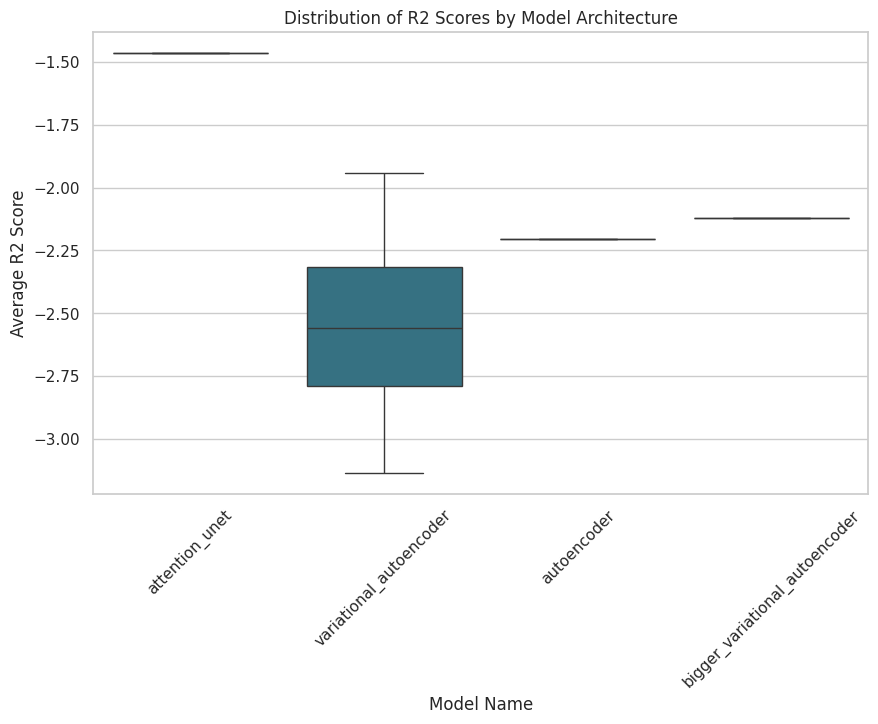

In [4]:
if 'avg_r2' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='model_name', y='avg_r2', palette='viridis')
    plt.title('Distribution of R2 Scores by Model Architecture')
    plt.ylabel('Average R2 Score')
    plt.xlabel('Model Name')
    plt.xticks(rotation=45)
    plt.show()

## 4. Impact of Latent Dimension
Does a larger latent space always lead to better regression performance?

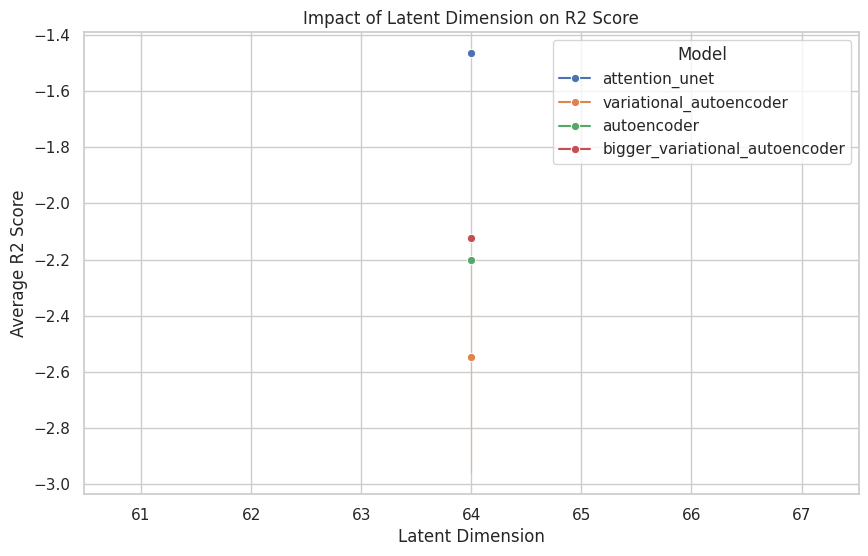

In [5]:
if 'avg_r2' in df.columns and 'latent_dim' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='latent_dim', y='avg_r2', hue='model_name', marker='o')
    plt.title('Impact of Latent Dimension on R2 Score')
    plt.ylabel('Average R2 Score')
    plt.xlabel('Latent Dimension')
    plt.legend(title='Model')
    plt.show()

## 5. Specific Target Predictions
Analyzing performance on specific physical properties (Height, Area, Volume).

In [6]:
target_cols = ['r2_Height', 'r2_Area', 'r2_Volume']
available_targets = [col for col in target_cols if col in df.columns]

if available_targets:
    # Melt dataframe for easier plotting with seaborn
    melted_df = df.melt(id_vars=['model_name', 'timestamp'], 
                        value_vars=available_targets, 
                        var_name='Target', 
                        value_name='R2 Score')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='Target', y='R2 Score', hue='model_name', errorbar=None)
    plt.title('Performance by Target Variable')
    plt.ylim(0, 1)  # R2 is typically max 1
    plt.show()